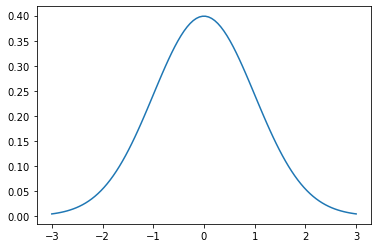

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

#mean
mu = 0
#variance
var = 1

sigma = math.sqrt(var)
#defining a range for x
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

#plot PDF for x
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()



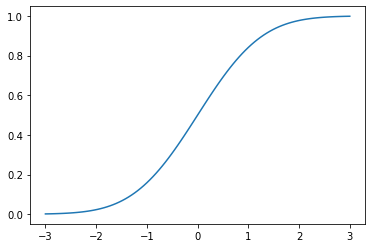

In [3]:
z = stats.norm.cdf(x)

#plot CDF for x
plt.plot(x, z)

/var/folders/y3/787bmhnx257b06mjgc8tdgvc0000gn/T/ipykernel_24633/830998339.py:24: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


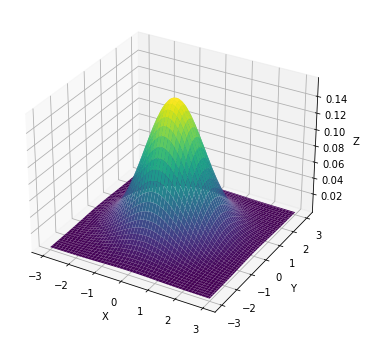

In [10]:
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D


mu_x = 0
var_x = 1

mu_y = 0
var_y = 1

sigma_x = math.sqrt(var_x)
sigma_y = math.sqrt(var_y)

#Create a grid for the multivariate gaussian distribution
x = np.linspace(mu_x - 3*sigma_x, mu_x + 3*sigma_x, 100)
y =np.linspace(mu_y - 3*sigma_y, mu_y + 3*sigma_y, 100)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
random_var = multivariate_normal([mu_x, mu_y], [[var_x, 0], [0, var_y]])

#Show a 3D plot for the multivariate gaussian distribution
fig = plt.figure(figsize=(8, 6))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, random_var.pdf(pos),cmap='viridis',linewidth=0)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [12]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X, y = fetch_openml(data_id=1464, return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

clf = make_pipeline(StandardScaler(), LogisticRegression(random_state=0))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=0))])

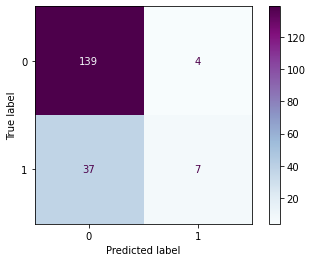

In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot(cmap='BuPu')